In [1]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [2]:
t.__version__

'0.2.0_3'

In [2]:
#设置随机种子， 保证在每次运行时下面的输出一致
t.manual_seed(1000)
def get_fake_data(batch_size = 8):
    # 产生随机数据： y = x * 2 + 3, 加上了一些噪声
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3
    return x, y

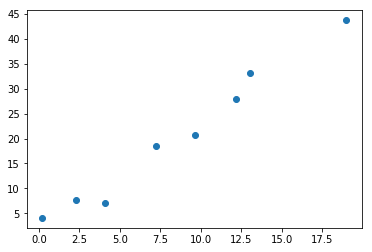

In [3]:
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [7]:
#随机初始化参数
w = t.rand(1, 1)
b = t.zeros(1, 1)
b.expand_as?

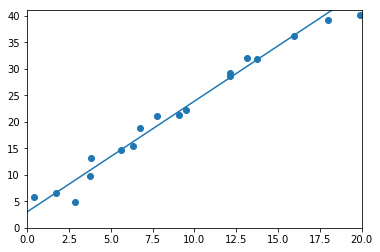

66 2.0889625549316406 2.978771924972534


In [8]:
lr = 0.001 # 学习率
for ii in range(20000):
    x, y = get_fake_data()
    #forward: 计算 loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2 #均方误差
    loss = loss.sum()
    
    #backward: 手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    #更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii % 1000 == 0:
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted(预测)
        
        x2, y2 = get_fake_data(batch_size = 20)
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show() # 程序输出
        plt.pause(0.5)
        print("66",w.squeeze()[0], b.squeeze()[0])

In [9]:
w.sub_?

In [14]:
from torch.autograd import Variable as V
def f(x):
    result = 1
    for ii in x:
        if ii.data[0] > 0: result = ii * result
    return result
x = V(t.arange(-2, 4), requires_grad = True)
y = f(x)
y.backward() # y = x[3] * x[4] * x[5]
x.grad

Variable containing:
 0
 0
 0
 6
 3
 2
[torch.FloatTensor of size 6]

In [13]:
x

Variable containing:
-2
-1
 0
 1
 2
 3
[torch.FloatTensor of size 6]

In [1]:
# 用 Variable 实现线性回归
import torch as t
%matplotlib inline
from torch.autograd import Variable as V
from matplotlib import pyplot as plt
from IPython import display

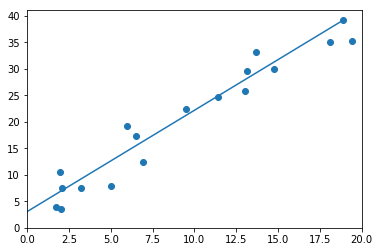

66 Variable containing:
 1.9116
[torch.FloatTensor of size 1]
 Variable containing:
 3.0375
[torch.FloatTensor of size 1]



In [4]:
# # 随机初始化参数
w = V(t.rand(1, 1), requires_grad = True)
b = V(t.zeros(1, 1), requires_grad = True)

lr = 0.001 # 学习率

for ii in range(8000):
    x, y = get_fake_data()
    x, y = V(x), V(y)
    
    # forward: 计算 loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2 #均方误差
    loss = loss.sum()
    
    #backward: 计算梯度
    loss.backward()
    
    #更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    #梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii % 1000 == 0:
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1)
        y = x.mm(w.data) + b.data.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted(预测)
        
        x2, y2 = get_fake_data(batch_size = 20)
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show() # 程序输出
        plt.pause(0.5)
        print("66",w.squeeze()[0], b.squeeze()[0])